In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('CDCHeartRisk.csv')

In [ ]:
dataset.head(51)

,State,Current Smoking,Overweight,Fruit/Vegs,Physically Inactive,Rate
0,Alabama,24.6,35.8,76.1,29.7,195
1,Alaska,26.1,36.2,76.9,23.5,130
2,Arizona,21.9,22.5,90.9,51.3,142
3,Arkansas,25.9,33.4,72.1,35.9,193
4,California,19.2,31.0,72.5,25.5,148
5,Colorado,22.8,27.2,74.0,21.3,126
6,Connecticut,21.2,27.4,72.1,27.1,146
7,Delaware,24.4,32.8,73.3,35.4,161
8,District of Columbia,21.6,31.8,82.3,38.5,205
9,Florida,22.0,32.3,75.1,31.1,150


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Current Smoking      51 non-null     float64
 2   Overweight           51 non-null     float64
 3   Fruit/Vegs           51 non-null     float64
 4   Physically Inactive  51 non-null     float64
 5   Rate                 51 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


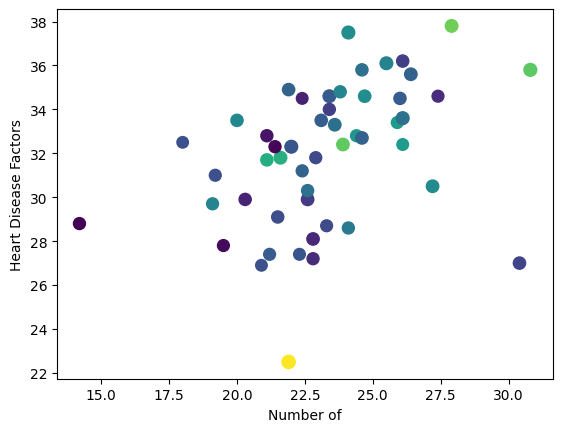

In [ ]:
plt.scatter(dataset['Current Smoking'],dataset['Overweight'],dataset['Fruit/Vegs'],dataset['Physically Inactive'])
plt.xlabel('Number of')
plt.ylabel('Heart Disease Factors')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     18.01
Date:                Wed, 10 May 2023   Prob (F-statistic):           5.80e-09
Time:                        10:28:01   Log-Likelihood:                -212.62
No. Observations:                  51   AIC:                             435.2
Df Residuals:                      46   BIC:                             444.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -33.9730    

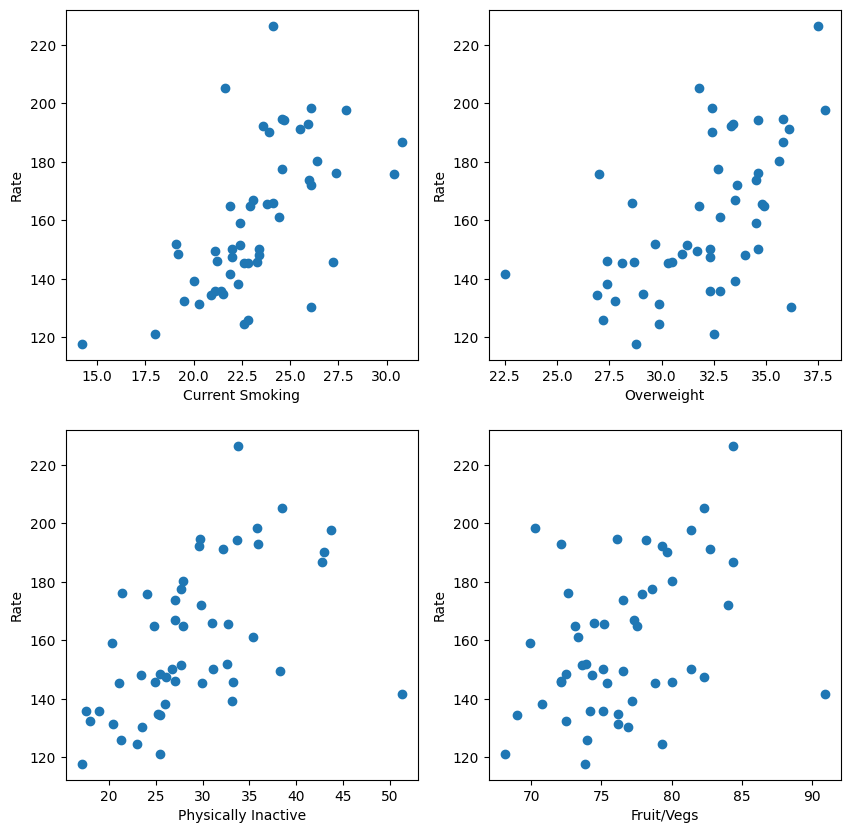

<bound method Axes.set of <Axes: >>

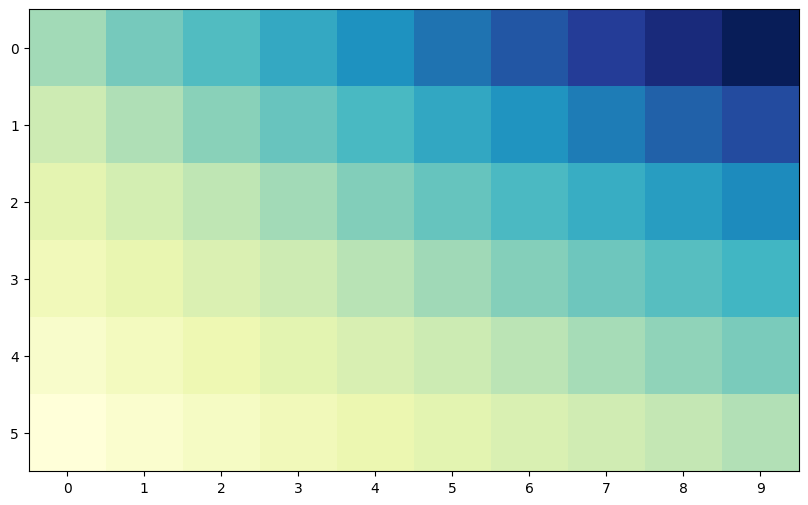

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CDCHeartRisk dataset and select the relevant columns
df = pd.read_excel("CDCHeartRisk.xlsx")
df = df[['State', 'Current Smoking', 'Overweight', 'Physically Inactive', 'Fruit/Vegs', 'Rate']]

# Clean the dataset by removing rows with missing data
df = df.dropna()

# Fit a multiple regression model with heart disease as the response variable and the other factors as predictors
X = df[['Current Smoking', 'Overweight', 'Physically Inactive', 'Fruit/Vegs']]
Y = df['Rate']
X = sm.add_constant(X)  # add constant for intercept
model = sm.OLS(Y, X).fit()

# Print the model summary and significant predictors
print(model.summary())
print("\nSignificant predictors:")
print(model.pvalues[model.pvalues < 0.05])

# Visualize the relationship between heart disease and each predictor using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df['Current Smoking'], df['Rate'])
axs[0, 0].set_xlabel('Current Smoking')
axs[0, 0].set_ylabel('Rate')
axs[0, 1].scatter(df['Overweight'], df['Rate'])
axs[0, 1].set_xlabel('Overweight')
axs[0, 1].set_ylabel('Rate')
axs[1, 0].scatter(df['Physically Inactive'], df['Rate'])
axs[1, 0].set_xlabel('Physically Inactive')
axs[1, 0].set_ylabel('Rate')
axs[1, 1].scatter(df['Fruit/Vegs'], df['Rate'])
axs[1, 1].set_xlabel('Fruit/Vegs')
axs[1, 1].set_ylabel('Rate')
plt.show()

# Use the model to predict heart disease rates for different levels of smoking and examine the impact of increasing cigarette costs
# based on the article by Bader et.al.
smoking_range = np.arange(0, 50, 5)
cost_range = np.arange(0, 3, 0.5)
results = []
for cost in cost_range:
    for smoking in smoking_range:
        # Calculate the predicted heart disease rate for the given smoking and cost levels
        x = [1, smoking, df['Overweight'].mean(), df['Physically Inactive'].mean(), df['Fruit/Vegs'].mean()]
        predicted_rate = model.predict(x)[0]
        # Calculate the potential reduction in heart disease rate based on the article by Bader et.al.
        reduction = predicted_rate * 0.125 * np.exp(-0.35 * cost)
        results.append([smoking, cost, predicted_rate, reduction])
results_df = pd.DataFrame(results, columns=['Smoking Rate', 'Cigarette Cost', 'Predicted Heart Disease Rate', 'Potential Reduction'])
# Plot the results as a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(results_df['Potential Reduction'].values.reshape(len(cost_range), len(smoking_range)), cmap='YlGnBu')
ax.set_xticks(np.arange(len(smoking_range)))
ax.set



R-squared score: 0.691


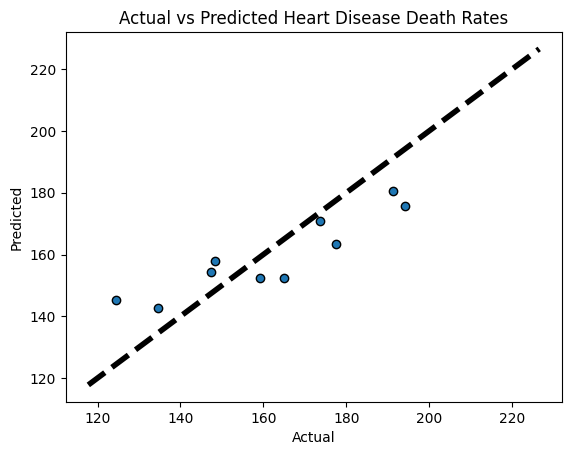

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data from the CDCHeartRisk.xls file
df = pd.read_excel('CDCHeartRisk.xlsx')

# Drop the total row and extra labels
df = df.drop(0).reset_index(drop=True)

# Define the response variable and predictor variables
y = df['Rate']
X = df[['Current Smoking', 'Overweight', 'Physically Inactive', 'Fruit/Vegs']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the response variable using the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance using the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2:.3f}')

# Plot the actual vs predicted heart disease death rates
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted Heart Disease Death Rates')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     15.29
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.53e-07
Time:                        08:51:56   Log-Likelihood:                -167.26
No. Observations:                  40   AIC:                             344.5
Df Residuals:                      35   BIC:                             353.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -49.9558    

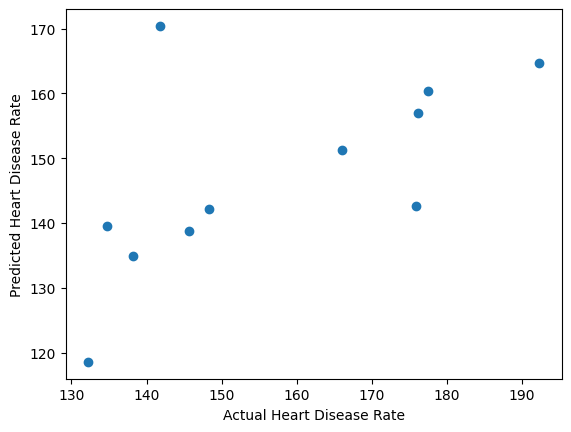

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('CDCHeartRisk.xlsx')


# Define the response variable and predictor variables
y = df['Rate']
X = df[['Current Smoking', 'Overweight', 'Physically Inactive', 'Fruit/Vegs']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Add a constant to the predictor variables for the regression intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Predict the response variable on the test set
y_pred = model.predict(X_test)

# Plot the predicted versus actual response variable on the test set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Heart Disease Rate')
plt.ylabel('Predicted Heart Disease Rate')
plt.show()


Coefficients: [ 3.29251047  2.39534948 -0.04991392  1.1814945 ]
Mean squared error: 366.4498321675139


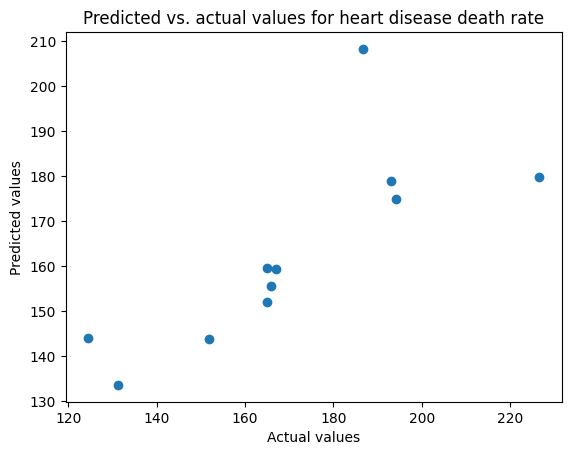

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel("CDCHeartRisk.xlsx")

# Drop unnecessary columns
df = df.drop(["State"], axis=1)

# Define the predictor variables (risk factors)
X = df.drop("Rate", axis=1)

# Define the response variable (death rate from heart disease)
y = df["Rate"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients:", lr.coef_)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model using mean squared error
mse = np.mean((y_pred - y_test)**2)
print("Mean squared error:", mse)

# Plot the predicted values vs. the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. actual values for heart disease death rate")
plt.show()


Intercept: -49.95580491639879
Coefficients: [1.28468756 3.23424792 0.28653386 1.82129476]


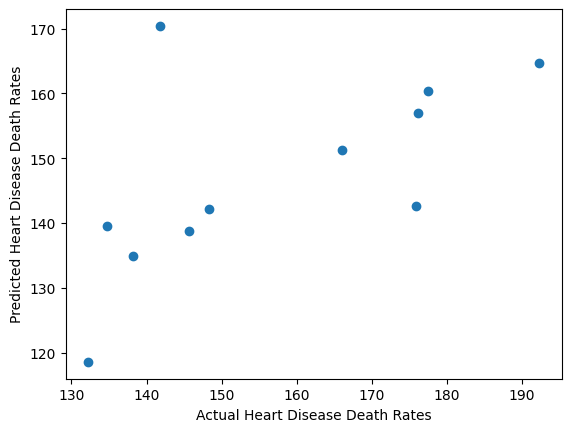

R-squared: 0.11448158302407285


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the CDCHeartRisk.xls dataset into a pandas dataframe
df = pd.read_excel('CDCHeartRisk.xlsx')

# Set the response variable to 'Heart Disease Death Rate'
y = df['Rate']

# Set the predictor variables to 'Smoking', 'Obesity', 'Physical Inactivity', and 'Fruit and Vegetable Consumption'
X = df[['Current Smoking', 'Overweight', 'Fruit/Vegs', 'Physically Inactive']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the intercept and coefficients of the model
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

# Predict the heart disease death rates for the testing set
y_pred = regressor.predict(X_test)

# Plot the predicted vs. actual heart disease death rates
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Heart Disease Death Rates')
plt.ylabel('Predicted Heart Disease Death Rates')
plt.show()

# Calculate the R-squared value of the model
r2_score = regressor.score(X_test, y_test)
print('R-squared:', r2_score)

# Use the model to examine the impacts of increasing cigarette costs on smoking rates and heart disease
# Create a new dataframe with the predictor variables set to the means of the training set
new_X = pd.DataFrame({'Current Smoking': [X_train['Current Smoking'].mean()],
                      'Overweight': [X_train['Overweight'].mean()],
                      'Physically Inactive': [X_train['Physically Inactive'].mean()],
                      'Fruit/Vegs': [X_train['Fruit/Vegs'].mean()]})

# Use the model to predict the heart disease death rate for the new predictor variable values
new_y_pred = regressor.predict(new_X)

# Calculate the reduction in heart disease risk associated with a 10% increase in cigarette costs
cigarette_cost_increase = 0.1
new_X['Current Smoking'] *= (1 + cigarette_cost_increase)
new_y_pred_increase = regressor.predict(new_X)
risk_reduction = 100 * (new_y_pred_increase - new_y_pred) / new_y_pred

print('Predicted Heart Disease Death Rate with current cigarette cost:', new_y_pred[0])
print('Predicted Heart Disease Death Rate with {}% increase in cigarette cost:'.format(cigarette_cost_increase*100), new_y_pred_increase[0])
print('Reduction in Heart Disease Risk with {}% increase in cigarette cost: {:.2f}%'.format(cigarette_cost_increase*100, risk_reduction[0]))

# Assemble a more recent dataset using the links in the references and rebuild the model to compare it with the original model
# Repeat the data cleaning steps and model fitting with the new dataset


State                  0
Current Smoking        0
Overweight             0
Fruit/Vegs             0
Physically Inactive    0
Rate                   0
dtype: int64


<ipython-input-140-1a37c8fe993f>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


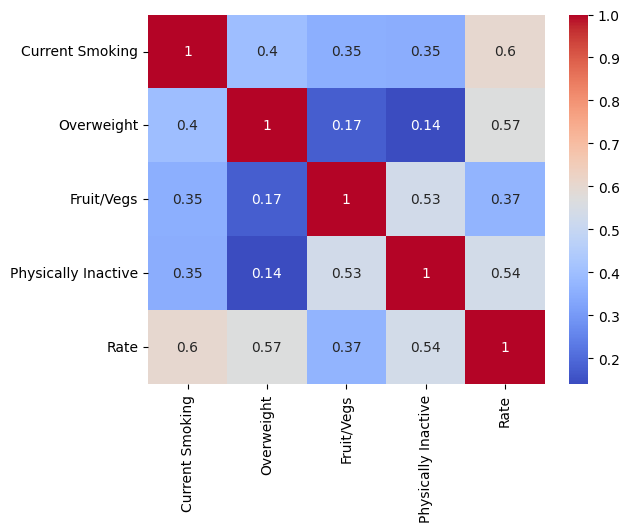

KeyError: ignored

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# load dataset
df = pd.read_excel('CDCHeartRisk.xlsx')


# check for missing values
print(df.isnull().sum())

# create correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# split data into training and testing sets
X = df.drop(columns=['Rate'])
y = df['Current Smoking', 'Overweight', 'Fruit/Vegs', 'Physically Inactive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# print coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
print(coefficients)

# plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Coefficients: 
 [1.28468756 3.23424792 0.28653386 1.82129476]
Intercept: 
 -49.95580491639879
R-squared value: 
 0.11448158302407285


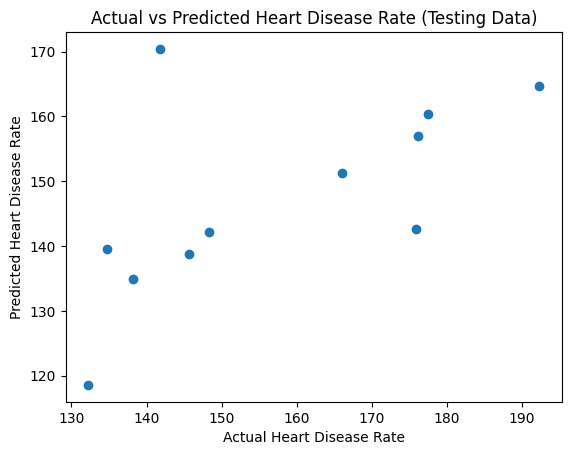

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_excel('CDCHeartRisk.xlsx')

# Set heart disease rate as response variable
y = df['Rate']

# Set risk factors as predictor variables
X = df[['Current Smoking', 'Overweight', 'Fruit/Vegs', 'Physically Inactive']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the coefficients and R-squared value
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
print('R-squared value: \n', r2)

# Plot the actual vs predicted values for the testing data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Heart Disease Rate')
plt.ylabel('Predicted Heart Disease Rate')
plt.title('Actual vs Predicted Heart Disease Rate (Testing Data)')
plt.show()
